## `Section 02: Merging Tables With Different Join Types`


### 01- Counting missing rows with left join

* Merge the `movies` table, as the left table, with the `financials` table using a left join, and save the result to `movies_financials`.



In [1]:
import pickle

with open('dataset/movies.p', 'rb') as f1, open('dataset/financials.p', 'rb') as f2:
    movies = pickle.load(f1)
    financials = pickle.load(f2)

In [2]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on="id", how="left")
movies_financials

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0
...,...,...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26,3000000.0,9012000.0
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11,NaN,NaN
4800,13807,Exiled,8.486390,2006-09-06,NaN,NaN
4801,73873,Albert Nobbs,7.802245,2011-12-21,8000000.0,5634828.0


* Count the number of rows in `movies_financials` with a null value in the `budget` column.

In [3]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


### 02-Enriching a dataset

* Merge `toy_story` and `taglines` on the `id` column with a left join, and save the result as `toystory_tag`.



In [4]:
import pandas as pd 
toy_story_dict = {"id":[10193, 863, 862], "title":["Toy Story 3", "Toy Story 2", "Toy Story"], 
                    "popularity":[59.995, 73.575, 73.640], 
                    "release_date":["2010-06-16", "1999-10-30", "1995-10-30"]} 

toy_story = pd.DataFrame(toy_story_dict)
toy_story

,id,title,popularity,release_date
0,10193,Toy Story 3,59.995,2010-06-16
1,863,Toy Story 2,73.575,1999-10-30
2,862,Toy Story,73.640,1995-10-30


In [5]:
with open('dataset/taglines.p', 'rb') as f1:
    taglines = pickle.load(f1) 

In [6]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on="id", how="left")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)


* With `toy_story` as the left table, merge to it `taglines` on the `id` column with an inner join, and save as `toystory_tag`.



In [7]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on="id", how="inner")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
(2, 5)


### 03- Right join to find unique movies

* Merge `action_movies` and `scifi_movies` tables with a right join on `movie_id`. Save the result as `action_scifi`.




In [8]:
with  open('dataset/movies.p', 'rb') as f1, open('dataset/movie_to_genres.p', 'rb') as f2:
    movies = pickle.load(f1)
    movies_genres = pickle.load(f2)

scifi_movies = movies_genres[movies_genres["genre"] == "Science Fiction"]
action_movies = movies_genres[movies_genres["genre"] == "Action"]

In [9]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on= "movie_id", how="right")

* Update the merge to add suffixes, where `'_act'` and `'_sci'` are suffixes for the left and right tables, respectively.



In [10]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


* From `action_scifi`, subset only the rows where the `genre_act` column is null.



In [11]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi["genre_act"].isna()]

* Merge `movies` and `scifi_only` using the `id` column in the left table and the `movie_id` column in the right table with an inner join.



In [12]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, how="inner",
                                     left_on="id", right_on="movie_id")

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


### 04-Popular genres with right join

* Merge `movie_to_genres` and `pop_movies` using a right join. Save the results as `genres_movies`.
* Group `genres_movies` by `genre` and count the number of `id` values.

In [27]:
movie_to_genres = movies_genres.copy()

In [28]:
pop_movies_dict = {"id":[211672, 157336, 293660, 118340, 76341, 135397, 22, 119450, 131631, 177572], 
                  "title":["Minions", "Interstellar", "Deadpool", "Guardians of the Galaxy", "Mad Max: Fury Road",
                   "Jurassic World", "Pirates of the Caribbean: The Curse of the Bla...", "Dawn of the Planet of the Apes",
                   "The Hunger Games: Mockingjay - Part 1", "Big Hero 6"],
                   "popularity":["875.581", "724.248", "514.570", "481.099", "434.279", "418.709", "271.973",
                                "243.792", "206.227", "203.735"],
                   "release_date":["2015-06-17", "2014-11-05", "2016-02-09", "2014-07-30", "2015-05-13",
                                   "2015-06-09", "2003-07-09", "2014-06-26", "2014-11-18", "2014-10-24" ]
                   }
pop_movies = pd.DataFrame(pop_movies_dict)

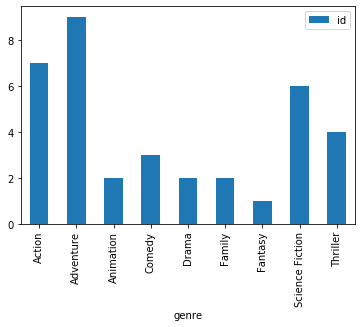

In [30]:
import matplotlib.pyplot as plt

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on="movie_id", 
                                      right_on="id")

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

### 05-Using outer join to select actors

* Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with `iron_2_actors` tables with an outer join on the id column, and set suffixes to `('_1','_2')`.
* Create an index that returns `True` if `name_1` or `name_2` are null, and `False` otherwise.


In [40]:
with open('dataset/casts.p', 'rb') as f1:
    movie_actors = pickle.load(f1)

In [51]:
# # To find actors who don't act in movies 

# Iron Man 1
iron_1_actors = movie_actors[movie_actors['movie_id']==1726]
iron_1_actors = iron_1_actors[['character', 'id', 'name']]

# Iron Man 2
iron_2_actors = movie_actors[movie_actors['movie_id']==10138]
iron_2_actors = iron_2_actors[['character', 'id', 'name']]

In [54]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     how="outer",
                                     on="id",
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isna()) | 
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                                    character_1      id           name_1  \
0                                        Yinsen   17857       Shaun Toub   
2                   Obadiah Stane / Iron Monger    1229     Jeff Bridges   
3  Lt. Col. James "Rhodey" Rhodes / War Machine   18288  Terrence Howard   
5                                          Raza   57452      Faran Tahir   
8                                    Abu Bakaar  173810    Sayed Badreya   

  character_2 name_2  
0         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
5         NaN    NaN  
8         NaN    NaN  


### 06-Self Join 

* To a variable called `crews_self_merged`, merge the `crews` table to itself on the `id` column using an inner join, setting the suffixes to `'_dir'` and `'_crew'` for the left and right tables respectively.




In [62]:
with open("dataset/crews.p", "rb") as f1:
    crews = pickle.load(f1)

crews[(crews["id"] == 19995) & (crews["department"] == "Editing")]

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
125,19995,Editing,Digital Intermediate,Marvin Hall


In [69]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on="id", how="inner", suffixes=("_dir", "_crew"))

crews_self_merged[(crews_self_merged["id"] == 19995) & (crews_self_merged["department_dir"] == "Editing") & 
                  (crews_self_merged["department_crew"] == "Editing")]


,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
42,19995,Editing,Editor,Stephen E. Rivkin,Editing,Digital Intermediate,Marvin Hall
2184,19995,Editing,Digital Intermediate,Marvin Hall,Editing,Editor,Stephen E. Rivkin
2226,19995,Editing,Digital Intermediate,Marvin Hall,Editing,Digital Intermediate,Marvin Hall


* Create a Boolean index, named `boolean_filter`, that selects rows from the left table with the job of `'Director'` and avoids rows with the job of `'Director'` in the right table.


In [71]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == "Director") & 
     (crews_self_merged['job_crew'] != "Director"))
direct_crews = crews_self_merged[boolean_filter]
direct_crews

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


* Use the `.head()` method to print the first few rows of `direct_crews`.

In [72]:
print(direct_crews.head())


        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


### 07-Index merge for movie ratings

* Merge `movies` and `ratings` on the index and save to a variable called `movies_ratings`, ensuring that all of the rows from the `movies` table are returned.



In [73]:
with open("dataset/movies.p", "rb") as f1, open("dataset/ratings.p", "rb") as f2:
    movies = pickle.load(f1)
    ratings = pickle.load(f2)


In [74]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on="id")

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


In [75]:
movies_ratings.shape

(4803, 6)

### 08-Do sequels earn more?

* With the `sequels` table on the left, merge to it the `financials` table on index named `id`, ensuring that all the rows from the `sequels` are returned and some rows from the other table may not be returned, Save the results to `sequels_fin`.

In [96]:
with open("dataset/sequels.p", "rb") as f1, open("dataset/financials.p", "rb") as f2: 
    sequels = pickle.load(f1)
    financials = pickle.load(f2)

In [101]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left').set_index("id")

* Merge the `sequels_fin` table to itself with an inner join, where the left and right tables merge on `sequel` and `id` respectively with suffixes equal to `('_org','_seq')`, saving to `orig_seq`.


In [103]:

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how="inner", left_on="sequel", 
                             right_on="id", right_index=True,
                             suffixes=("_org","_seq"))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
orig_seq

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08,123812836.0
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,<NA>,200000000.0,1.066970e+09,569602834.0
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,<NA>,250000000.0,9.339592e+08,-4253541.0
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09,192601579.0
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08,54919036.0
...,...,...,...,...,...,...,...,...,...,...
76,80,Before Sunrise,80,2500000.0,5535405.0,Before Sunset,132344,2700000.0,1.599262e+07,10457210.0
2292,2295,Clerks,2295,27000.0,3151130.0,Clerks II,<NA>,5000000.0,2.688838e+07,23737246.0
9367,8068,El Mariachi,8068,220000.0,2040920.0,Desperado,1428,7000000.0,2.540544e+07,23364525.0


* Select the `title_org`, title_seq, and `diff` columns of `orig_seq` and save this as `titles_diff`.



In [105]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]
titles_diff

,title_org,title_seq,diff
id,,,
862,Toy Story,Toy Story 2,123812836.0
863,Toy Story 2,Toy Story 3,569602834.0
675,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253541.0
121,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601579.0
120,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919036.0
...,...,...,...
76,Before Sunrise,Before Sunset,10457210.0
2292,Clerks,Clerks II,23737246.0
9367,El Mariachi,Desperado,23364525.0


* Sort by `titles_diff` by `diff` in descending order and print the first few rows.

In [106]:
# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values("diff", ascending=False).head())

               title_org        title_seq          diff
id                                                     
331    Jurassic Park III   Jurassic World  1.144748e+09
272        Batman Begins  The Dark Knight  6.303398e+08
10138         Iron Man 2       Iron Man 3  5.915067e+08
863          Toy Story 2      Toy Story 3  5.696028e+08
10764  Quantum of Solace          Skyfall  5.224703e+08


==================================
### `The End`
==================================